# Script 1 : Generate Figure 2B

### Organize e-photosynthesis (ODE) model assimilation rate

In [1]:
import glob

ODE_Vc_dict=dict()
ODE_Vo_dict=dict()
for fname in glob.glob("LC_ODEfluxes_Fig2B*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            ODE_Vc_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])
        if "vo" in line:
            ODE_Vo_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vo")[1])


ODE_A_dict=dict()
for k in ODE_Vc_dict.keys():
    ODE_A_dict[k] = ODE_Vc_dict[k] - (0.5*ODE_Vo_dict[k])

### Organize FBA model assimilation rate

In [2]:
import glob

FBA_A_dict=dict()
for fname in glob.glob("FBAfluxes_Fig2B*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx1" in line:
            FBA_A_dict[int(fname.split("_")[2].split(".")[0])] = float(line.split(",")[2])


### Organize lightly-coupled (LC) model assimilation rate

In [3]:
import glob


LC_FBA_A_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2B*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx1" in line:
            LC_FBA_A_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])

### Organize tightly-coupled (TC) model assimilation rate

In [4]:
import glob

TC_ODE_A_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2B*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            TC_ODE_A_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])


TC_FBA_A_dict=dict()
for fname in glob.glob("TC_FBAfluxes_Fig2B*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx" in line:
            TC_FBA_A_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])


TC_A_dict=dict()
for k in TC_ODE_A_dict.keys():
    TC_A_dict[k] = TC_ODE_A_dict[k] + TC_FBA_A_dict[k]

### Data from litterature

Zhang et al 2011 data

In [5]:
Zhang = dict()
Zhang[0]=6.7
Zhang[100]=-0.76
Zhang[200]=3.1
Zhang[300]=6.2
Zhang[500]=11.7
Zhang[800]=16.4
Zhang[1200]=20.5
Zhang[1500]=21.8
Zhang[1800]=23.2
Zhang[2000]=23.5

Yao et al data

In [6]:
Yao = dict()
Yao[20]=-2.7
Yao[45]=-0.7
Yao[80]=1
Yao[100]=2
Yao[200]=6.2
Yao[400]=12.8
Yao[600]=17.3
Yao[800]=20.1
Yao[1000]=22.1
Yao[1200]=23.6
Yao[1500]=25.1



Haile et al data

In [7]:
Haile = dict()
Haile[10]=-0.1
Haile[50]=2
Haile[100]=4
Haile[200]=8.9
Haile[500]=16.7
Haile[1000]=23.5
Haile[1300]=25
Haile[1600]=26.7
Haile[10]=-3.8
Haile[50]=-0.9
Haile[100]=2
Haile[200]=6.9
Haile[500]=15.7
Haile[1000]=21.3
Haile[1300]=23.9
Haile[1600]=23.8




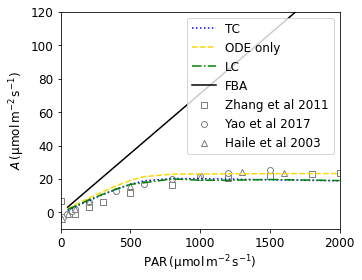

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 12})

Clist1 = list()
Alist1 = list()
for k in sorted(TC_A_dict.keys()):
    Clist1.append(k)
    Alist1.append(TC_A_dict[k])
plt.plot(Clist1,Alist1,label="TC",linestyle=":",color="blue")

Clist2 = list()
Alist2 = list()
for k in sorted(ODE_A_dict.keys()):
    Clist2.append(k)
    Alist2.append(ODE_A_dict[k])
plt.plot(Clist2,Alist2,label="ODE only",linestyle="--",color="gold")

Clist3 = list()
Alist3 = list()
for k in sorted(LC_FBA_A_dict.keys()):
    Clist3.append(k)
    Alist3.append(LC_FBA_A_dict[k])
plt.plot(Clist3,Alist3,label="LC",linestyle="-.",color="green")

Clist4 = list()
Alist4 = list()
for k in sorted(FBA_A_dict.keys()):
    Clist4.append(k)
    Alist4.append(FBA_A_dict[k])
plt.plot(Clist4,Alist4,label="FBA",color="black")

ClistD1 = list()
AlistD1 = list()
for k in sorted(Zhang.keys()):
    ClistD1.append(k)
    AlistD1.append(Zhang[k])
plt.scatter(ClistD1,AlistD1,label="Zhang et al 2011",marker='s',edgecolor="grey",facecolor="white")

ClistD2 = list()
AlistD2 = list()
for k in sorted(Yao.keys()):
    ClistD2.append(k)
    AlistD2.append(Yao[k])
plt.scatter(ClistD2,AlistD2,label="Yao et al 2017",marker='o',edgecolor="grey",facecolor="white")

ClistD3 = list()
AlistD3 = list()
for k in sorted(Haile.keys()):
    ClistD3.append(k)
    AlistD3.append(Haile[k])
plt.scatter(ClistD3,AlistD3,label="Haile et al 2003",marker='^',edgecolor="grey",facecolor="white")

plt.xlim(0,2000)
plt.ylim(-10,120)
plt.xlabel(r'$\mathrm{PAR\/(\mu mol\/m^{-2}\/s^{-1})}$')
plt.ylabel(r'$A\/\mathrm{(\mu mol\/m^{-2}\/s^{-1})}$')

plt.legend()
#plt.show()
#plt.savefig("Fig3B_14Jun.svg",format="svg")

In [9]:
Clist3

[50, 100, 200, 300, 400, 500, 600, 800, 1000, 1200, 1500, 2000]

In [10]:
Alist3

[1.751485073467314,
 3.673246274067841,
 7.4365469669165,
 10.855780207086202,
 14.06243617106176,
 16.80473104791913,
 17.806797048504567,
 20.062569231246137,
 19.29220278899903,
 19.226249066575583,
 19.708134583927777,
 19.086183408718203]

In [11]:
Alist1

[1.2753114167922441,
 3.227286087362387,
 7.00014232063342,
 10.579783403654822,
 13.873448621621222,
 16.81992174622064,
 18.939614748987985,
 20.330682896270787,
 20.176612258709785,
 19.945700607567403,
 19.57874976619251,
 18.933153762030173]

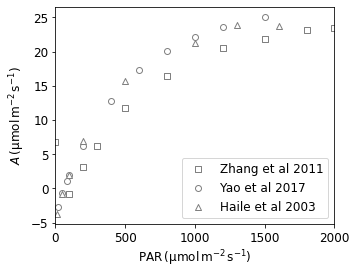

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 12})

Clist1 = list()
Alist1 = list()
for k in sorted(TC_A_dict.keys()):
    Clist1.append(k)
    Alist1.append(TC_A_dict[k])
#plt.plot(Clist1,Alist1,label="TC",linestyle=":",color="blue")

Clist2 = list()
Alist2 = list()
for k in sorted(ODE_A_dict.keys()):
    Clist2.append(k)
    Alist2.append(ODE_A_dict[k])
#plt.plot(Clist2,Alist2,label="ODE only",linestyle="--",color="gold")

Clist3 = list()
Alist3 = list()
for k in sorted(LC_FBA_A_dict.keys()):
    Clist3.append(k)
    Alist3.append(LC_FBA_A_dict[k])
#plt.plot(Clist3,Alist3,label="LC",linestyle="-.",color="green")

Clist4 = list()
Alist4 = list()
for k in sorted(FBA_A_dict.keys()):
    Clist4.append(k)
    Alist4.append(FBA_A_dict[k])
#plt.plot(Clist4,Alist4,label="FBA",color="black")

ClistD1 = list()
AlistD1 = list()
for k in sorted(Zhang.keys()):
    ClistD1.append(k)
    AlistD1.append(Zhang[k])
plt.scatter(ClistD1,AlistD1,label="Zhang et al 2011",marker='s',edgecolor="grey",facecolor="white")

ClistD2 = list()
AlistD2 = list()
for k in sorted(Yao.keys()):
    ClistD2.append(k)
    AlistD2.append(Yao[k])
plt.scatter(ClistD2,AlistD2,label="Yao et al 2017",marker='o',edgecolor="grey",facecolor="white")

ClistD3 = list()
AlistD3 = list()
for k in sorted(Haile.keys()):
    ClistD3.append(k)
    AlistD3.append(Haile[k])
plt.scatter(ClistD3,AlistD3,label="Haile et al 2003",marker='^',edgecolor="grey",facecolor="white")

plt.xlim(0,2000)
#plt.ylim(-10,120)
plt.xlabel(r'$\mathrm{PAR\/(\mu mol\/m^{-2}\/s^{-1})}$')
plt.ylabel(r'$A\/\mathrm{(\mu mol\/m^{-2}\/s^{-1})}$')

plt.legend()
plt.show()
#plt.savefig("Fig3B_14Jun.svg",format="svg")

## 